In [1]:
#import libraries

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import zipfile
import urllib.request

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("trolukovich/food11-image-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'food11-image-dataset' dataset.
Path to dataset files: /kaggle/input/food11-image-dataset


In [8]:
#setting path for dataset
dataset_path = "/kaggle/input/food11-image-dataset/evaluation"





In [4]:
#setting up file location

data_dir = "/kaggle/input/food11-image-dataset/evaluation"


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train data with aug
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3
)

#val data with no augment
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

#training generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

#validation gen
val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False               #keep validation deterministic
)

Found 2347 images belonging to 11 classes.
Found 1000 images belonging to 11 classes.


In [6]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import LeakyReLU

model = models.Sequential([
    layers.Conv2D(32, (3,3), input_shape=(128, 128, 3)),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3)),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(64),
    LeakyReLU(alpha=0.1),

    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,571 (14.14 MB)

 Trainable params: 3,706,571 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 34s 232ms/step - accuracy: 0.2440 - loss: 2.1507 - val_accuracy: 0.3350 - val_loss: 1.9566
Epoch 2/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.3381 - loss: 1.8987 - val_accuracy: 0.3430 - val_loss: 1.9013
Epoch 3/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.3375 - loss: 1.8659 - val_accuracy: 0.3650 - val_loss: 1.8578
Epoch 4/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - accuracy: 0.3734 - loss: 1.7842 - val_accuracy: 0.3560 - val_loss: 2.0086
Epoch 5/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - accuracy: 0.3936 - loss: 1.7258 - val_accuracy: 0.3290 - val_loss: 2.0183
Epoch 6/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.4130 - loss: 1.7016 - val_accuracy: 0.3900 - val_loss: 1.8063
Epoch 7/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 0.4098 - loss: 1.6452 - val_accuracy: 0.3810 - val_loss: 1.8638
Epoch 8/15
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.4300 - loss: 1

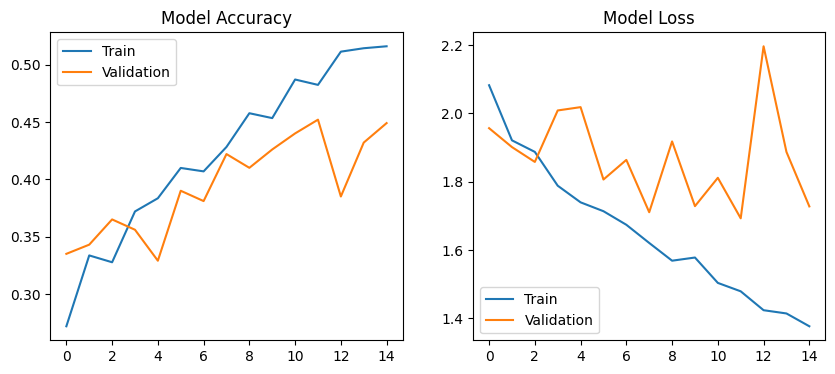

In [10]:
#plotting accuracy and loss

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Number of validation samples
val_steps = val_generator.samples // val_generator.batch_size + 1

# Predict probabilities
pred_probs = model.predict(val_generator, steps=val_steps)

# Convert probabilities to class indices
y_pred = np.argmax(pred_probs, axis=1)

# True labels
y_true = val_generator.classes

# Class names
class_names = list(val_generator.class_indices.keys())
class_names = ['Bread', 'Dairy Product', 'Dessert','Egg','Fried food','Meat','Noodles-Pasta','Rice','Seafood','Soup','Vegetable-Fruit']



print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step
Classification Report:

                 precision    recall  f1-score   support

          Bread       0.47      0.16      0.24       110
  Dairy Product       0.20      0.30      0.24        44
        Dessert       0.43      0.47      0.45       150
            Egg       0.45      0.25      0.32       100
     Fried food       0.32      0.35      0.33        86
           Meat       0.43      0.65      0.52       129
  Noodles-Pasta       0.45      0.64      0.53        44
           Rice       0.00      0.00      0.00        28
        Seafood       0.44      0.44      0.44        90
           Soup       0.63      0.56      0.59       150
Vegetable-Fruit       0.63      0.81      0.71        69

       accuracy                           0.45      1000
      macro avg       0.40      0.42      0.40      1000
   weighted avg       0.45      0.45      0.43      1000

